<a href="https://colab.research.google.com/github/VMKR23/Movies/blob/main/FNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Epoch [1/10], Training Loss: 1.6005, Test Loss: 1.5268
Epoch [2/10], Training Loss: 1.5219, Test Loss: 1.5141
Epoch [3/10], Training Loss: 1.5069, Test Loss: 1.5025
Epoch [4/10], Training Loss: 1.4996, Test Loss: 1.4955
Epoch [5/10], Training Loss: 1.4928, Test Loss: 1.4979
Epoch [6/10], Training Loss: 1.4887, Test Loss: 1.4895
Epoch [7/10], Training Loss: 1.4852, Test Loss: 1.4949
Epoch [8/10], Training Loss: 1.4828, Test Loss: 1.4859
Epoch [9/10], Training Loss: 1.4801, Test Loss: 1.4866
Epoch [10/10], Training Loss: 1.4782, Test Loss: 1.4886


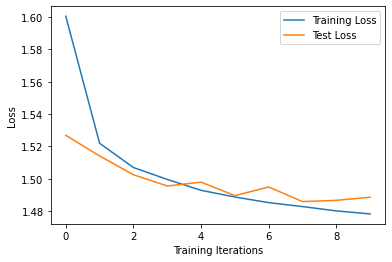

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the FNN architecture
class FNN(nn.Module):
    def __init__(self):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='data/', train=False, transform=transforms.ToTensor(), download=True)

# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=128, shuffle=False)

# Instantiate the FNN and optimizer
model = FNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Train the model
num_epochs = 10
train_losses = []
test_losses = []
for epoch in range(num_epochs):
    train_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the training loss
        train_loss += loss.item()

    # Calculate the average training loss for the epoch
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Test the model
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

    # Calculate the average test loss for the epoch
    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    # Print progress
    print('Epoch [{}/{}], Training Loss: {:.4f}, Test Loss: {:.4f}'
          .format(epoch+1, num_epochs, train_loss, test_loss))

# Plot the training and test loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Training Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
